# Review of Experimental Results for L8

In [1]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import make_interp_spline
import time

In [2]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [3]:
studies = studies.sort_values(by=1)
studies.head(20)

,0,1,2,3
37,study_846A,0.004191,"FrozenTrial(number=141, values=[0.004191230615...","[FrozenTrial(number=141, values=[0.00419123061..."
38,study_846B,0.005588,"FrozenTrial(number=128, values=[0.005588089084...","[FrozenTrial(number=128, values=[0.00558808908..."
36,study_8469,0.008238,"FrozenTrial(number=25, values=[0.0082383903083...","[FrozenTrial(number=25, values=[0.008238390308..."
42,study_8569,0.012276,"FrozenTrial(number=93, values=[0.0122762255717...","[FrozenTrial(number=93, values=[0.012276225571..."
14,study_246B,0.017163,"FrozenTrial(number=102, values=[0.017163399667...","[FrozenTrial(number=102, values=[0.01716339966..."
12,study_2469,0.019827,"FrozenTrial(number=113, values=[0.019826640045...","[FrozenTrial(number=113, values=[0.01982664004..."
26,study_346B,0.020326,"FrozenTrial(number=113, values=[0.020325603184...","[FrozenTrial(number=113, values=[0.02032560318..."
44,study_856B,0.035287,"FrozenTrial(number=72, values=[0.0352869710919...","[FrozenTrial(number=72, values=[0.035286971091..."
24,study_3469,0.036803,"FrozenTrial(number=85, values=[0.0368026392418...","[FrozenTrial(number=85, values=[0.036802639241..."
25,study_346A,0.050963,"FrozenTrial(number=17, values=[0.0509632412787...","[FrozenTrial(number=17, values=[0.050963241278..."


## Confirm Trial Results
Make sure the above results can be duplicated

In [4]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        rmse = 100
        mae0 = 100
        r20 = 0
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        rmse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return rmse, mae0, r20

#### Generate Data

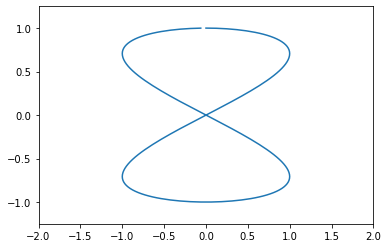

In [5]:
#Generate Figure 8 Data
t_all = np.linspace(0, 2*(23000/200), 23000)
t = t_all[0:3000]
t_val = t_all[3000:]
omega = 1

x = np.sin(2*math.pi*omega*t)
x = x.reshape(-1,1)
x_val = np.sin(2*math.pi*omega*t_val)
x_val = x_val.reshape(-1,1)

y = np.cos(math.pi*omega*t)
y = y.reshape(-1,1)
y_val = np.cos(math.pi*omega*t_val)
y_val = y_val.reshape(-1,1)

plt.plot(x[0:200], y[0:200])
plt.ylim(-1.25, 1.25)
plt.xlim(-2,2)
plt.show()

data = np.column_stack((x,y))
dataval = np.column_stack((x_val,y_val))

#### Trial vs Recreated

In [6]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 0
L = 2
N = 20
v = np.random.uniform(-0.01,0.01,(20000, 20))
sv = 0
outAlg = 1 
isBias = True
isClassification = False

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    washout = 1000
    model.sv = 0
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = None, teacher=data, washout=washout)
    model.sv = 1
    predicted = model.run(input_u=None, time=20000,washout=1000)

    nrmse0, mae0, r20 = getScores(dataval[1000:], predicted)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(nrmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_846A
RMSE: 0.004191230615890987, 0.004191230615890987
MAE: 0.0030785908795193826, 0.0030785908795193826
R2: 0.9999648665069779, 0.9999648665069779

study_846B
RMSE: 0.005588089084474876, 0.005588089084474876
MAE: 0.004100724696392172, 0.004100724696392172
R2: 0.9999375450377477, 0.9999375450377477

study_8469
RMSE: 0.008238390308307987, 0.008238390308307987
MAE: 0.006258535889677789, 0.006258535889677789
R2: 0.9998642545648319, 0.9998642545648319

study_8569
RMSE: 0.012276225571786606, 0.012276225571786606
MAE: 0.009157463987064072, 0.009157463987064072
R2: 0.9996985809201915, 0.9996985809201915

study_246B
RMSE: 0.01716339966789869, 0.01716339966789869
MAE: 0.012867009388312112, 0.012867009388312112
R2: 0.9994108219287874, 0.9994108219287874

study_2469
RMSE: 0.01982664004581986, 0.01982664004581986
MAE: 0.01436529472785487, 0.01436529472785487
R2: 0.999213784811342, 0.999213784811342

study_346B
RMSE: 0.020325603184915338, 0.020325603184915338
MAE: 0.01522953611814399, 0.015229

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [113]:
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,29):
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            
            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)


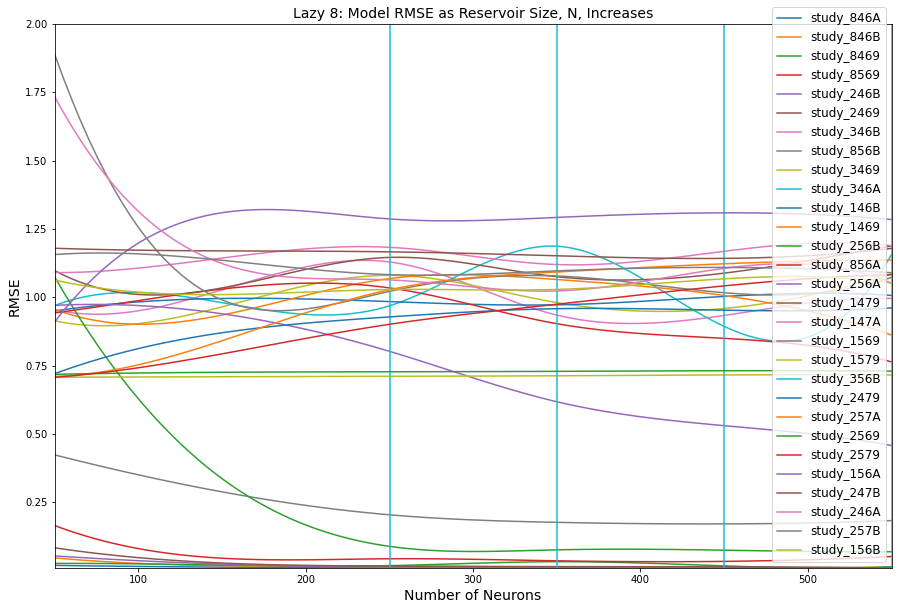

In [127]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([0.01,2])
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('Lazy 8: Model RMSE as Reservoir Size, N, Increases', fontsize=14)
plt.show()

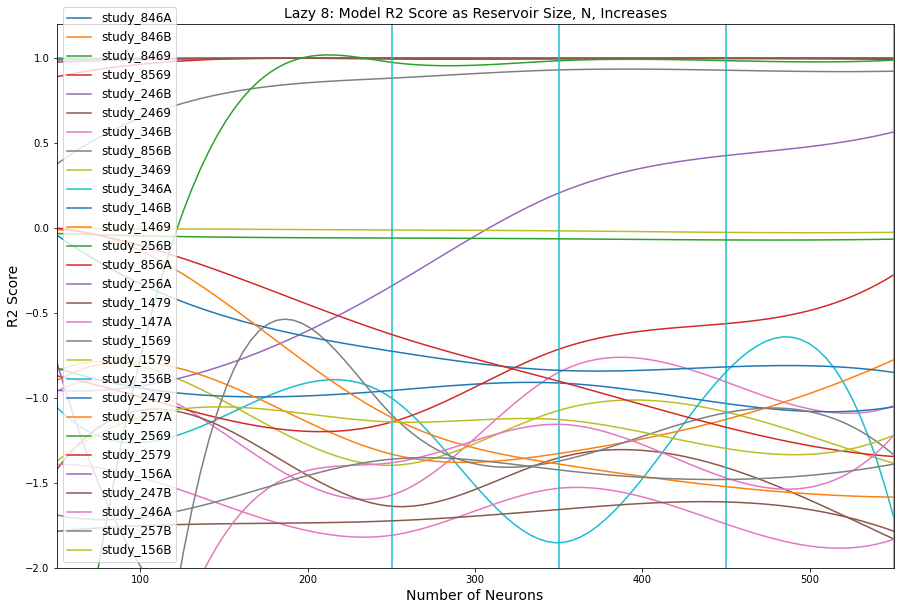

In [130]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo30.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([-2.0,1.2])
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('Lazy 8: Model R2 Score as Reservoir Size, N, Increases', fontsize=14)
plt.show()

In [131]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

,study_846A,study_846B,study_8469,study_8569,study_246B,study_2469,study_346B,study_856B,study_3469,study_346A,study_146B,study_1469,study_256B,study_856A,study_256A,study_1479,study_147A,study_1569,study_1579,study_356B,study_2479,study_257A,study_2569,study_2579,study_156A,study_247B,study_246A,study_257B,study_156B
0,0.018887,0.046374,0.025979,0.164767,0.053577,0.083245,0.954722,0.423439,0.914052,0.970134,0.949906,0.956415,1.075646,0.943043,0.970776,1.098256,1.090798,1.891041,0.707764,5.299586e+138,0.720548,0.710720,0.718260,0.707226,0.909495,1.179805,1.735061,1.156757,1.063290
1,0.012426,0.017759,0.019844,0.045116,0.023486,0.027541,1.027527,0.288052,0.965268,0.980508,0.995895,0.935240,0.336567,1.030345,0.939865,1.034561,1.144007,0.990757,0.709401,3.002389e+144,0.870439,0.841194,0.725750,0.793222,1.309929,1.170162,1.123813,1.135783,1.010214
2,0.010491,0.016291,0.018062,0.043058,0.011185,0.016261,1.129794,0.204061,1.080572,0.968929,0.984582,1.068693,0.088580,1.034685,0.802486,1.146263,1.183210,1.021739,0.711122,3.863060e+66,0.928396,1.027810,0.727630,0.901359,1.287085,1.166633,1.064000,1.083209,1.028681
3,0.011000,0.012242,0.032382,0.035640,0.010294,0.014442,0.935131,0.176472,0.980945,1.187471,0.972817,1.065425,0.075703,0.903688,0.617921,1.075600,1.120164,1.078333,0.712909,1.270104e+11,0.958485,1.092934,0.729167,0.974811,1.292627,1.152268,1.023447,1.097010,1.029057
4,0.010287,0.011288,0.017107,0.033518,0.008985,0.013469,0.933817,0.170687,0.959404,0.893657,1.003300,1.006571,0.074487,0.849965,0.530277,1.088727,1.168636,1.017048,0.716010,1.761464e+00,0.953077,1.122971,0.731423,1.042071,1.309448,1.142753,1.106162,1.109612,1.067913
5,0.007206,0.011403,0.014172,0.051290,0.005464,0.008980,0.996117,0.182737,1.085986,1.156718,1.007134,0.862203,0.068940,0.763585,0.457439,1.188525,1.189097,1.073283,0.715920,4.993891e+45,0.961424,1.136621,0.729813,1.082775,1.285097,1.179384,1.052085,1.090076,1.052308


In [134]:
plotInfo30.iloc[5,:]

study_846A    9.998735e-01
study_846B    9.996529e-01
study_8469    9.995622e-01
study_8569    9.934654e-01
study_246B    9.999323e-01
study_2469    9.998167e-01
study_346B   -1.046572e+00
study_856B    9.235195e-01
study_3469   -1.384533e+00
study_346A   -1.700103e+00
study_146B   -1.052719e+00
study_1469   -7.757679e-01
study_256B    9.884048e-01
study_856A   -2.761608e-01
study_256A    5.655435e-01
study_1479   -1.830113e+00
study_147A   -1.832533e+00
study_1569   -1.334553e+00
study_1579   -2.509526e-02
study_356B   -6.982602e+92
study_2479   -8.498974e-01
study_257A   -1.583953e+00
study_2569   -6.531158e-02
study_2579   -1.344903e+00
study_156A   -2.305004e+00
study_247B   -1.784067e+00
study_246A   -1.221576e+00
study_257B   -1.389748e+00
study_156B   -1.219491e+00
Name: 5, dtype: float64

In [158]:
#r2Mean = plotInfo30.mean(axis=0)
r2Mean = plotInfo30.iloc[5,:].sort_values(ascending=False)
r2Mean[:9]

study_246B    0.999932
study_846A    0.999874
study_2469    0.999817
study_846B    0.999653
study_8469    0.999562
study_8569    0.993465
study_256B    0.988405
study_856B    0.923519
study_256A    0.565544
Name: 5, dtype: float64

In [165]:
plotInfo3Avg = plotInfo3[[r2Mean.index[0], r2Mean.index[1], r2Mean.index[2], r2Mean.index[3], r2Mean.index[4], r2Mean.index[5], r2Mean.index[6], r2Mean.index[7], r2Mean.index[8]]]
plotInfo3Avg = plotInfo3Avg.mean(axis=0)
plotInfo3Avg = plotInfo3Avg.sort_values()

In [166]:
plotInfo3_10 = plotInfo3[[plotInfo3Avg.index[0], plotInfo3Avg.index[1], plotInfo3Avg.index[2], plotInfo3Avg.index[3], plotInfo3Avg.index[4], plotInfo3Avg.index[5], plotInfo3Avg.index[6], plotInfo3Avg.index[7], plotInfo3Avg.index[8]]]

In [167]:
plotInfo3_10.head(10)

,study_846A,study_246B,study_846B,study_8469,study_2469,study_8569,study_856B,study_256B,study_256A
0,0.018887,0.053577,0.046374,0.025979,0.083245,0.164767,0.423439,1.075646,0.970776
1,0.012426,0.023486,0.017759,0.019844,0.027541,0.045116,0.288052,0.336567,0.939865
2,0.010491,0.011185,0.016291,0.018062,0.016261,0.043058,0.204061,0.088580,0.802486
3,0.011000,0.010294,0.012242,0.032382,0.014442,0.035640,0.176472,0.075703,0.617921
4,0.010287,0.008985,0.011288,0.017107,0.013469,0.033518,0.170687,0.074487,0.530277
5,0.007206,0.005464,0.011403,0.014172,0.008980,0.051290,0.182737,0.068940,0.457439


In [168]:
orderedStudies = pd.DataFrame()
for i in plotInfo3Avg.index:
    orderedStudies = pd.concat([orderedStudies, studies.loc[studies.iloc[:,0] == i]])
orderedStudies = orderedStudies.reset_index(drop=True)
orderedStudies.head(10)

,0,1,2,3
0,study_846A,0.004191,"FrozenTrial(number=141, values=[0.004191230615...","[FrozenTrial(number=141, values=[0.00419123061..."
1,study_246B,0.017163,"FrozenTrial(number=102, values=[0.017163399667...","[FrozenTrial(number=102, values=[0.01716339966..."
2,study_846B,0.005588,"FrozenTrial(number=128, values=[0.005588089084...","[FrozenTrial(number=128, values=[0.00558808908..."
3,study_8469,0.008238,"FrozenTrial(number=25, values=[0.0082383903083...","[FrozenTrial(number=25, values=[0.008238390308..."
4,study_2469,0.019827,"FrozenTrial(number=113, values=[0.019826640045...","[FrozenTrial(number=113, values=[0.01982664004..."
5,study_8569,0.012276,"FrozenTrial(number=93, values=[0.0122762255717...","[FrozenTrial(number=93, values=[0.012276225571..."
6,study_856B,0.035287,"FrozenTrial(number=72, values=[0.0352869710919...","[FrozenTrial(number=72, values=[0.035286971091..."
7,study_256B,0.138946,"FrozenTrial(number=146, values=[0.138946053871...","[FrozenTrial(number=146, values=[0.13894605387..."
8,study_256A,0.506749,"FrozenTrial(number=110, values=[0.506748744576...","[FrozenTrial(number=110, values=[0.50674874457..."


In [169]:
studies.head(10)

,0,1,2,3
0,study_846A,0.004191,"FrozenTrial(number=141, values=[0.004191230615...","[FrozenTrial(number=141, values=[0.00419123061..."
1,study_846B,0.005588,"FrozenTrial(number=128, values=[0.005588089084...","[FrozenTrial(number=128, values=[0.00558808908..."
2,study_8469,0.008238,"FrozenTrial(number=25, values=[0.0082383903083...","[FrozenTrial(number=25, values=[0.008238390308..."
3,study_8569,0.012276,"FrozenTrial(number=93, values=[0.0122762255717...","[FrozenTrial(number=93, values=[0.012276225571..."
4,study_246B,0.017163,"FrozenTrial(number=102, values=[0.017163399667...","[FrozenTrial(number=102, values=[0.01716339966..."
5,study_2469,0.019827,"FrozenTrial(number=113, values=[0.019826640045...","[FrozenTrial(number=113, values=[0.01982664004..."
6,study_346B,0.020326,"FrozenTrial(number=113, values=[0.020325603184...","[FrozenTrial(number=113, values=[0.02032560318..."
7,study_856B,0.035287,"FrozenTrial(number=72, values=[0.0352869710919...","[FrozenTrial(number=72, values=[0.035286971091..."
8,study_3469,0.036803,"FrozenTrial(number=85, values=[0.0368026392418...","[FrozenTrial(number=85, values=[0.036802639241..."
9,study_346A,0.050963,"FrozenTrial(number=17, values=[0.0509632412787...","[FrozenTrial(number=17, values=[0.050963241278..."


In [ ]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3_10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([0,2])
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('Lazy 8: Model RMSE as Reservoir Size, N, Increases: Top 9', fontsize=14)
plt.show()

In [174]:
for i in range (0,9):
    print(orderedStudies.iloc[i,0])
    print(orderedStudies.iloc[i,2].params)
    print("\n")

study_846A
{'p': 0.8501965562812667, 'a': 0.02072373822805785, 'dw': 0.10058738443731437, 'dfb': 0.5938516780838764, 'din': 0.24478433224604743, 'sin': 0.791195465774344, 'sfb': 1.3786047847785634, 'B': 0.002401829829257553}


study_246B
{'p': 0.8971020291754769, 'a': 0.0437681455588981, 'dw': 0.47038679669084155, 'dfb': 0.6651479136661085, 'din': 0.9194688156783356, 'sin': 0.4553272881927348, 'sfb': 1.1389690264717531, 'B': 0.002292524141953427}


study_846B
{'p': 0.47163038219444653, 'a': 0.02125807386630776, 'dw': 0.19588632620935795, 'dfb': 0.7751230270899211, 'din': 0.519357031118256, 'sin': 1.68241425497044, 'sfb': 1.0399287096373628, 'B': 0.004520710422521413}


study_8469
{'p': 0.7155824893181177, 'a': 0.02267689445433657, 'dw': 0.22478813011425094, 'dfb': 0.7980529344168028, 'din': 0.24699826611863257, 'sin': 0.6118689005541654, 'sfb': 1.0399679688403098, 'B': 0.001085709832457361}


study_2469
{'p': 0.9123984349097597, 'a': 0.03586335874356783, 'dw': 0.8042152498945494, 'dfb'

# Time Complexity

In [ ]:
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 250
washout = 1000

x = np.arange(50,1550,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,9): #pick a model
    N = 50
    p = orderedStudies.iloc[i,2].params['p']
    a = orderedStudies.iloc[i,2].params['a']
    dw = orderedStudies.iloc[i,2].params['dw']
    dfb = orderedStudies.iloc[i,2].params['dfb']
    din = orderedStudies.iloc[i,2].params['din']
    sin = orderedStudies.iloc[i,2].params['sin']
    sfb = orderedStudies.iloc[i,2].params['sfb']
    B = orderedStudies.iloc[i,2].params['B']
    isU2Y = orderedStudies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = orderedStudies.iloc[i,2].user_attrs['isY2Y']
    resFunc = orderedStudies.iloc[i,2].user_attrs['resFunc']
    outFunc = orderedStudies.iloc[i,2].user_attrs['outFunc']
    distribution = orderedStudies.iloc[i,2].user_attrs['distribution']
    
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            
            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[orderedStudies.iloc[i,0]])), axis=1)

In [ ]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimeTrain.columns[col])
    
n = np.arange(1,1300)
exponential = 0.00000125*np.power(n,2)
nlogn = 0.0001*n*np.log(n)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)
plt.plot(n,nlogn,label='O(Nlog(N))', color='#808080', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,1])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Training Time as Reservoir Size, N, Increases: Top 9', fontsize=14)
plt.show()

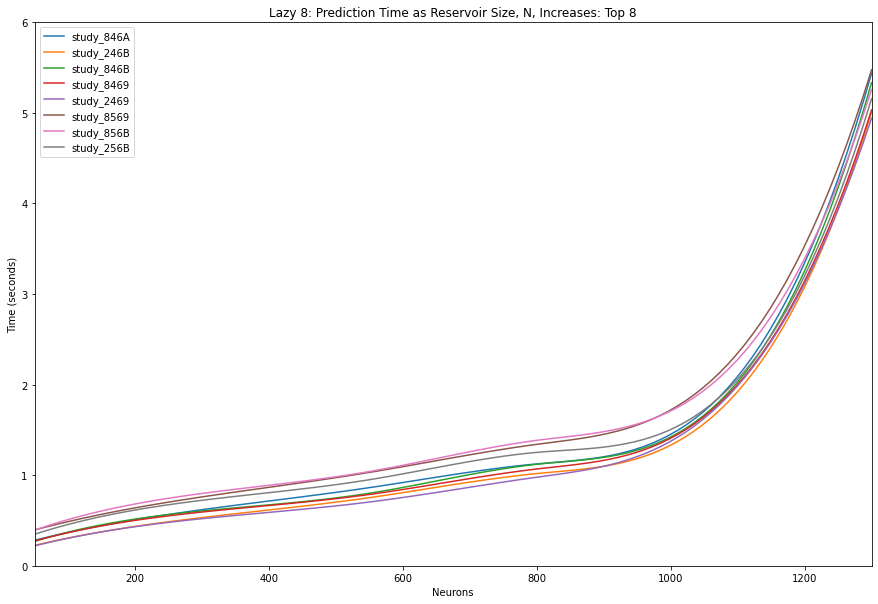

In [18]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimePredict.columns[col])
    
#n = np.arange(1,550)
#orderOfN = (*n)+0.25
#plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,6])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Lazy 8: Prediction Time as Reservoir Size, N, Increases: Top 9',fontsize=14)
plt.show()

# Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [19]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo0 = pd.DataFrame()

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo0TimeTrain = pd.DataFrame()
plotInfo0TimePredict = pd.DataFrame()
for c in range(1,3): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[str(c)])), axis=1)
    plotInfo0TimeTrain = pd.concat((plotInfo0TimeTrain, pd.DataFrame(w, columns=[str(c)])), axis=1)
    plotInfo0TimePredict = pd.concat((plotInfo0TimePredict, pd.DataFrame(n, columns=[str(c)])), axis=1)

In [20]:
plotInfo0 = plotInfo0.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo0TimeTrain = plotInfo0TimeTrain.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo0TimePredict = plotInfo0TimePredict.rename(columns={"1": "study_8469", "2": "study_8569"})

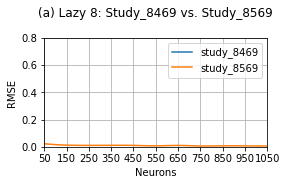

In [21]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(a) Lazy 8: Study_8469 vs. Study_8569\n')
plt.xlabel('Neurons')
plt.ylabel('RMSE')
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0,0.8])
plt.grid()
plt.show()

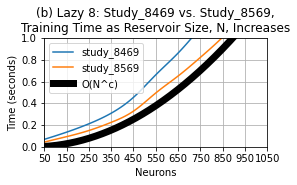

In [22]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b) Lazy 8: Study_8469 vs. Study_8569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

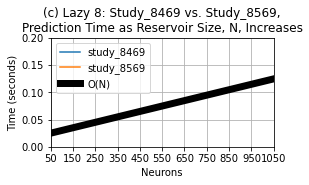

In [23]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_8469 vs. Study_8569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## Same exact model with different activation function

In [24]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo1TimeTrain = pd.DataFrame()
plotInfo1TimePredict = pd.DataFrame()
while(count < 3):
    i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    if count == 0:
        resFunc = 1
        print('tanh')
    elif count == 1:
        resFunc = 2
        print('sinc')
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo1TimeTrain = pd.concat((plotInfo1TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo1TimePredict = pd.concat((plotInfo1TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

sinc


In [25]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo1TimeTrain = plotInfo1TimeTrain.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo1TimePredict = plotInfo1TimePredict.rename(columns={"1": "study_8469", "2": "study_8569"})

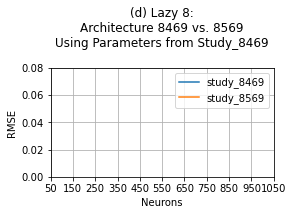

In [26]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(d) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8469\n')
plt.show()

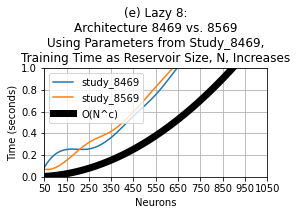

In [27]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

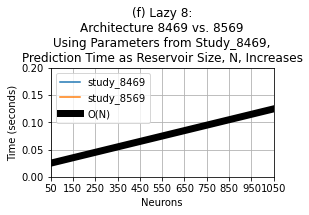

In [28]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [29]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo2TimeTrain = pd.DataFrame()
plotInfo2TimePredict = pd.DataFrame()
while(count < 3):
    i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0] #selection of model
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo2TimeTrain = pd.concat((plotInfo2TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo2TimePredict = pd.concat((plotInfo2TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [30]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo2TimeTrain = plotInfo2TimeTrain.rename(columns={"1": "study_8469", "2": "study_8569"})
plotInfo2TimePredict = plotInfo2TimePredict.rename(columns={"1": "study_8469", "2": "study_8569"})

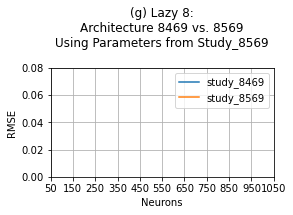

In [31]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8569\n')
plt.show()

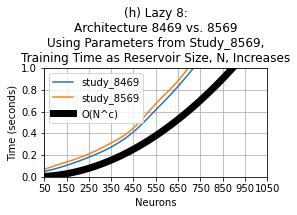

In [32]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

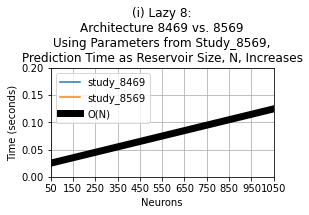

In [33]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8:\nArchitecture 8469 vs. 8569\nUsing Parameters from Study_8569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [34]:
studies.iloc[studies.loc[studies.iloc[:,0] == 'study_8469'].index[0],2].params

{'p': 0.5237966781779282,
 'a': 0.09953019758424918,
 'dw': 0.711420722898018,
 'dfb': 0.7684587427261629,
 'din': 0.018455556731745662,
 'sin': 0.15690906771571742,
 'sfb': 1.2502845605974688,
 'B': 1.1549667441942975}

In [35]:
studies.iloc[studies.loc[studies.iloc[:,0] == 'study_856A'].index[0],2].params

{'p': 0.08921601449562333,
 'a': 0.8557384677608086,
 'dw': 0.349640132374954,
 'dfb': 0.8498857380098674,
 'din': 0.20330115103970872,
 'sin': 1.9301693228010073,
 'sfb': 1.0990611176840082,
 'B': 0.8335934957104422}

In [36]:
studies.iloc[studies.loc[studies.iloc[:,0] == 'study_856B'].index[0],2].params

{'p': 0.049185252749361,
 'a': 0.4327448955461518,
 'dw': 0.12510713227357598,
 'dfb': 0.6881482784230519,
 'din': 0.7103386614585472,
 'sin': 1.4304404819542547,
 'sfb': 1.4889543937891823,
 'B': 1.1183856705298165}

#### Plotted each Model w/ Different Parameters/Distribution

In [37]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo4TimeTrain = pd.DataFrame()
plotInfo4TimePredict = pd.DataFrame()
for c in range(0,3): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif c == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]


        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(c)])), axis=1)
    plotInfo4TimeTrain = pd.concat((plotInfo4TimeTrain, pd.DataFrame(w, columns=[str(c)])), axis=1)
    plotInfo4TimePredict = pd.concat((plotInfo4TimePredict, pd.DataFrame(n, columns=[str(c)])), axis=1)

In [38]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo4TimeTrain = plotInfo4TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo4TimePredict = plotInfo4TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

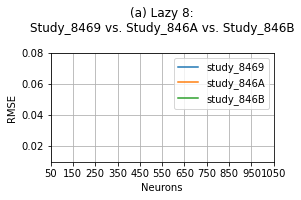

In [39]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(a) Lazy 8:\nStudy_8469 vs. Study_846A vs. Study_846B\n')
plt.show()

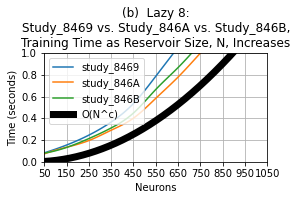

In [40]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b)  Lazy 8:\nStudy_8469 vs. Study_846A vs. Study_846B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

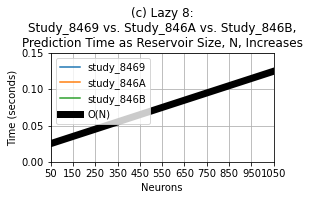

In [41]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8:\nStudy_8469 vs. Study_846A vs. Study_846B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_8469 optimized model

In [43]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo5TimeTrain = pd.DataFrame()
plotInfo5TimePredict = pd.DataFrame()
i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
while(count < 3):
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count

    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo5TimeTrain = pd.concat((plotInfo5TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo5TimePredict = pd.concat((plotInfo5TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [44]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo5TimeTrain = plotInfo5TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo5TimePredict = plotInfo5TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

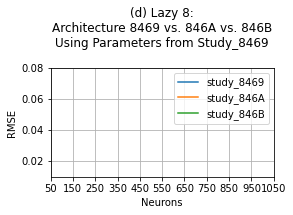

In [45]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(d) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_8469\n')
plt.show()

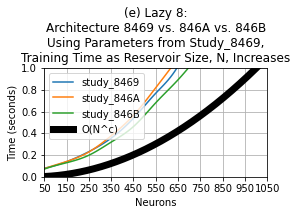

In [46]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_8469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

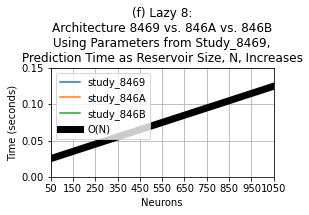

In [47]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_8469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_846A optimized model

In [48]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo6TimeTrain = pd.DataFrame()
plotInfo6TimePredict = pd.DataFrame()
while(count < 3):
    i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0] #selection of model
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count

    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo6TimeTrain = pd.concat((plotInfo6TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo6TimePredict = pd.concat((plotInfo6TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [49]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo6TimeTrain = plotInfo6TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo6TimePredict = plotInfo6TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

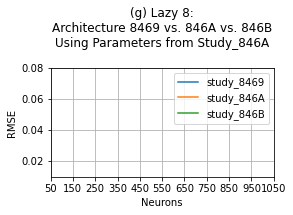

In [50]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_846A\n')
plt.show()

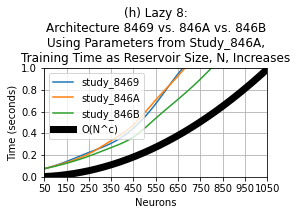

In [51]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000009*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_846A,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

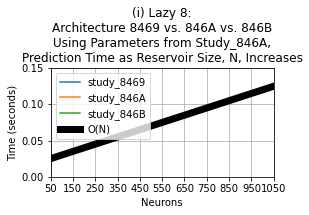

In [52]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_846A,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_846B optimized model

In [55]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo7TimeTrain = pd.DataFrame()
plotInfo7TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
while(count < 3):
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count

    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[studies.iloc[count,0]])), axis=1)
    plotInfo7TimeTrain = pd.concat((plotInfo7TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo7TimePredict = pd.concat((plotInfo7TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [56]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo7TimeTrain = plotInfo7TimeTrain.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})
plotInfo7TimePredict = plotInfo7TimePredict.rename(columns={"0": "study_8469", "1": "study_846A", "2": "study_846B"})

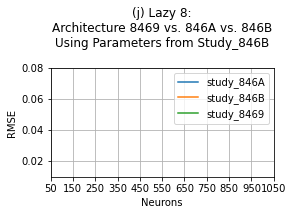

In [57]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(j) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_846B\n')
plt.show()

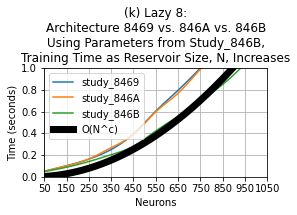

In [58]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(k) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_846B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

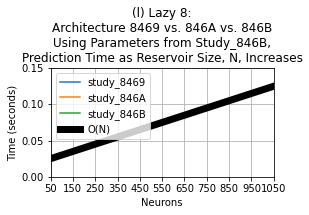

In [59]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Lazy 8:\nArchitecture 8469 vs. 846A vs. 846B\nUsing Parameters from Study_846B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

In [71]:
studies = studies.reset_index(drop=True)

## How did the parameters vary between the models with different connections?

In [64]:
print(studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,2].params

study_146B


{'p': 0.6888772535695441,
 'a': 0.07134931619289811,
 'dw': 0.22833802044329835,
 'dfb': 0.4096801628295442,
 'din': 0.4111265392206588,
 'sin': 0.0701109041442611,
 'sfb': 1.5925906663591427,
 'B': 0.006536592505253408}

In [65]:
print(studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,2].params

study_246B


{'p': 0.8971020291754769,
 'a': 0.0437681455588981,
 'dw': 0.47038679669084155,
 'dfb': 0.6651479136661085,
 'din': 0.9194688156783356,
 'sin': 0.4553272881927348,
 'sfb': 1.1389690264717531,
 'B': 0.002292524141953427}

In [66]:
print(studies.loc[studies.iloc[:,0] == 'study_346B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_346B'].iloc[0,2].params

study_346B


{'p': 0.8699422956690332,
 'a': 0.036903476777572636,
 'dw': 0.6573265857099149,
 'dfb': 0.395553838590089,
 'din': 0.7949789463834354,
 'sin': 1.2005033779201422,
 'sfb': 1.0569434293698579,
 'B': 0.007177746692301431}

In [67]:
print(studies.loc[studies.iloc[:,0] == 'study_846B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_846B'].iloc[0,2].params

study_846B


{'p': 0.47163038219444653,
 'a': 0.02125807386630776,
 'dw': 0.19588632620935795,
 'dfb': 0.7751230270899211,
 'din': 0.519357031118256,
 'sin': 1.68241425497044,
 'sfb': 1.0399287096373628,
 'B': 0.004520710422521413}

study_146B
RMSE: 0.07111676575317234, 0.07111676575317234
MAE: 0.04814086213490869, 0.04814086213490869
R2: 0.9898845341511047, 0.9898845341511047

study_246B
RMSE: 0.01716339966789869, 0.01716339966789869
MAE: 0.012867009388312112, 0.012867009388312112
R2: 0.9994108219287874, 0.9994108219287874

study_346B
RMSE: 0.020325603184915338, 0.020325603184915338
MAE: 0.01522953611814399, 0.01522953611814399
R2: 0.9991737177226632, 0.9991737177226632

study_846B
RMSE: 0.005588089084474876, 0.005588089084474876
MAE: 0.004100724696392172, 0.004100724696392172
R2: 0.9999375450377477, 0.9999375450377477



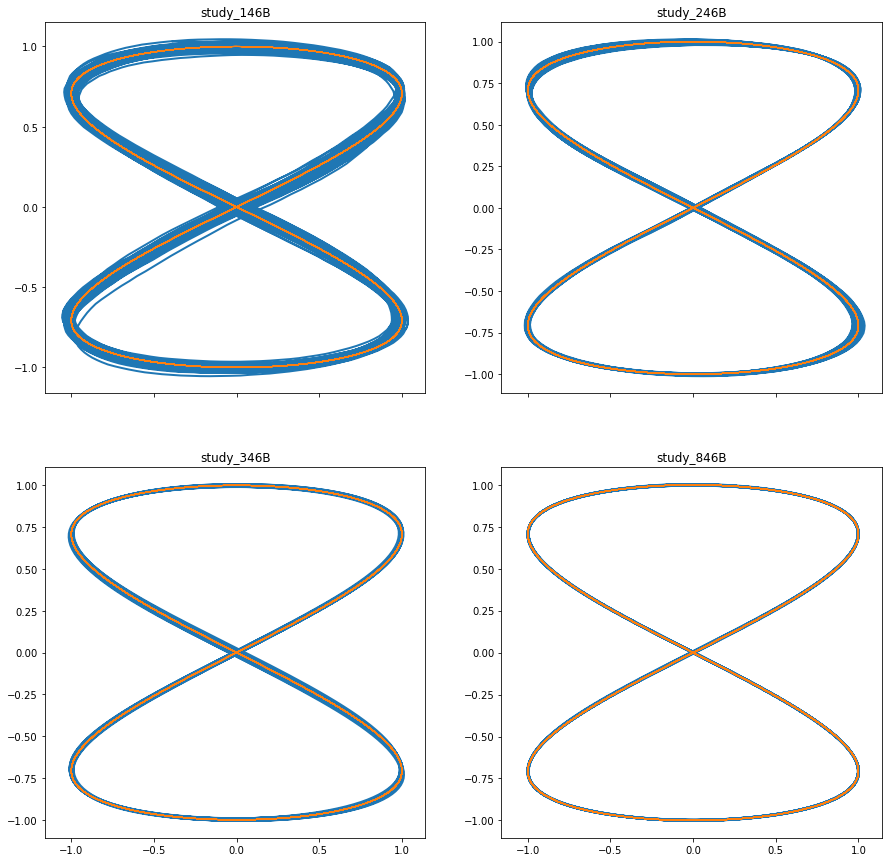

In [78]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 0
L = 2
N = 20
v = np.random.uniform(-0.01,0.01,(20000, 20))
sv = 0
outAlg = 1 
isBias = True
isClassification = False
washout = 1000
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(15,15))

for c in range(0,4):
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
        j = 0
        k = 0
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
        j = 0
        k = 1
    elif c == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
        j = 1
        k = 0
    elif c == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
        j = 1
        k = 1
        
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    model.sv = 0
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = None, teacher=data, washout=washout)
    model.sv = 1
    predicted = model.run(input_u=None, time=20000,washout=washout)

    nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(nrmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")
    
    axs[j,k].plot(predicted[:,0],predicted[:,1],linewidth=2,label='Predicted')
    axs[j,k].plot(dataval[washout:,0],dataval[washout:,1], linewidth=1, label='Actual')
    axs[j,k].set_title(studies.iloc[i,0])

#### Plotted each Model w/ Different Parameters/Distribution

In [85]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo8= pd.DataFrame()
plotInfo80 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo8TimeTrain = pd.DataFrame()
plotInfo8TimePredict = pd.DataFrame()

while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    #uConn = False
    #yConn = False
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
        #yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo80 = pd.concat((plotInfo80, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo8TimeTrain = pd.concat((plotInfo8TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo8TimePredict = pd.concat((plotInfo8TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [86]:
plotInfo8 = plotInfo8.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo80 = plotInfo80.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo8TimeTrain = plotInfo8TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo8TimePredict = plotInfo8TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

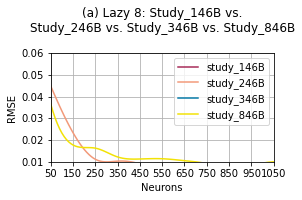

In [87]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo8.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8.columns[col], color=colors[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.06])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(a) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B\n')
plt.show()

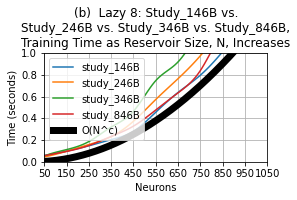

In [88]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b)  Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

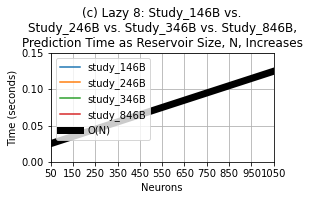

In [89]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### Using the same set of parameters, does varying the connection impair the model's ability to perform?

In [90]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo9= pd.DataFrame()
plotInfo90 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo9TimeTrain = pd.DataFrame()
plotInfo9TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo9 = pd.concat((plotInfo9, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo90 = pd.concat((plotInfo90, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo9TimeTrain = pd.concat((plotInfo9TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo9TimePredict = pd.concat((plotInfo9TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [91]:
plotInfo9 = plotInfo9.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo9TimeTrain = plotInfo9TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo9TimePredict = plotInfo9TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

In [96]:
plotInfo90 = plotInfo90.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

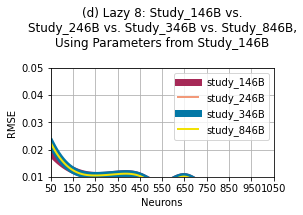

In [92]:
#add to plot
plt.figure(figsize=(4, 2))
changeWidth = 7
size = plotInfo9.shape[1]
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,int(size / 2)):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 5
    
changeWidth = 7
for col in range(int(size / 2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth- 5

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(d) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_146B\n')
plt.show()

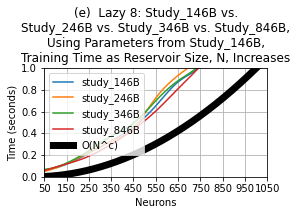

In [93]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e)  Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_146B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

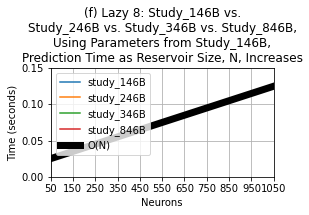

In [94]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_146B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [95]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo10= pd.DataFrame()
plotInfo100 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo10TimeTrain = pd.DataFrame()
plotInfo10TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo10 = pd.concat((plotInfo10, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo100 = pd.concat((plotInfo100, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo10TimeTrain = pd.concat((plotInfo10TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo10TimePredict = pd.concat((plotInfo10TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [97]:
plotInfo10 = plotInfo10.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo100 = plotInfo100.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo10TimeTrain = plotInfo10TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo10TimePredict = plotInfo10TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

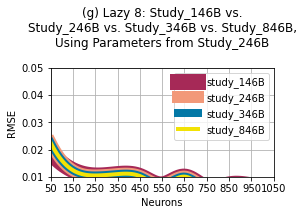

In [98]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 16
for col in range(0,plotInfo10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10.columns[col], color=colors[col], linewidth = changeWidth)
    changeWidth = changeWidth - 4

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(g) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_246B\n')
plt.show()

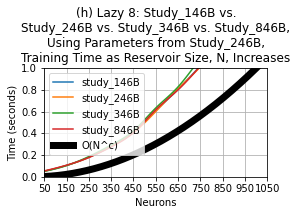

In [99]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_246B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

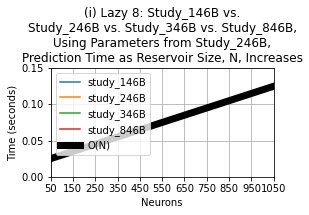

In [100]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_246B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [103]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo11= pd.DataFrame()
plotInfo110 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo11TimeTrain = pd.DataFrame()
plotInfo11TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo11 = pd.concat((plotInfo11, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo110 = pd.concat((plotInfo110, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo11TimeTrain = pd.concat((plotInfo11TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo11TimePredict = pd.concat((plotInfo11TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [104]:
plotInfo11 = plotInfo11.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo110 = plotInfo110.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo11TimeTrain = plotInfo11TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo11TimePredict = plotInfo11TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

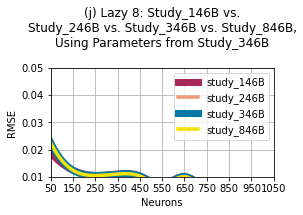

In [105]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo11.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(j) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_346B\n')
plt.show()

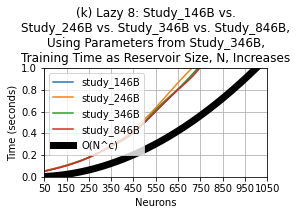

In [106]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(k) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_346B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

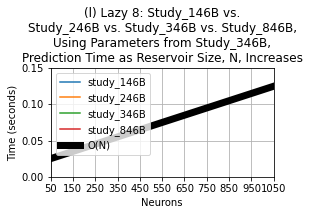

In [107]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_346B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [108]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100
washout = 1000

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo12= pd.DataFrame()
plotInfo120 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo12TimeTrain = pd.DataFrame()
plotInfo12TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time()
            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=washout)
            end = time.time()

            nrmse0, mae0, r20 = getScores(dataval[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo12 = pd.concat((plotInfo12, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo120 = pd.concat((plotInfo120, pd.DataFrame(z, columns=[str(count)])), axis=1)
    plotInfo12TimeTrain = pd.concat((plotInfo12TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo12TimePredict = pd.concat((plotInfo12TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [109]:
plotInfo12 = plotInfo12.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo120 = plotInfo120.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo12TimeTrain = plotInfo12TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo12TimePredict = plotInfo12TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

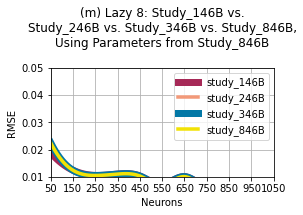

In [110]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo12.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(m) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_846B\n')
plt.show()

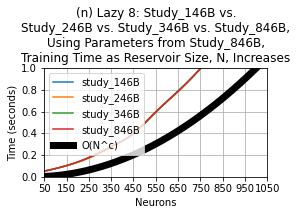

In [111]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(n) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_846B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

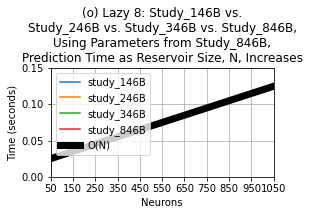

In [112]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) Lazy 8: Study_146B vs.\nStudy_246B vs. Study_346B vs. Study_846B,\nUsing Parameters from Study_846B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## Which connections within the reservoir give the worst setup for this pattern generation task?

The following models generated awful R2 scores:

In [85]:
for i in range (29,48):
    print(studies.iloc[i,0])
    print(studies.iloc[i,2].user_attrs['R2'])
    print("\n")

study_157A
-2.3885241462462403e-07


study_157B
-2.659517589487237e-07


study_247A
-2.7082702647174273e-07


study_3569
-2.9184800442561e-05


study_146A
-0.0009017608205412753


study_356A
-0.001176520351642285


study_147B
-0.0545508951475685


study_3579
-0.2626236364141211


study_357B
-0.29136304342351727


study_847A
-0.42597212146082664


study_8479
-0.4304003708479833


study_347B
-0.4695157564123341


study_857A
-0.6500427360247684


study_357A
-0.6602176389473039


study_347A
-0.6701714647928475


study_8579
-0.6849671423445043


study_3479
-0.7367278207766674


study_847B
-0.8069975033239174


study_857B
-0.9119776609898591




A majority of these models have one thing in common:, a hyperbolic tangent output activation. For the lazy figure 8 benchmark, this extra layer of non-linearity does not seem to be needed and makes the prediction of the pattern increasingly more difficult for the model as the optimization algorithm was not able to find a good set of parameters within the defined search space and set amount of trials.<br>

There also seem to be a few trials with linear readout that did not perform well so we diagnose them here. The serious of trials 356\*, where \* is one of the distribution choices, did not overall perform well. Although trial 356B has a positive R2 score, it was on the low side at 0.0012755. Studies 356A and 3569 did not perform well at all with negative R2 scores. However, models 346\* seemed to all perform very well with final best scores above 0.99481. With this in mind, it seems the sinc reservoir activation function does not perform well for model connections u(t), x(t), y(t) into the output unit. We use the good set of parameters from the 346B model to see if the 356B model has a chance at improving performance. However, testing both of these models reveals that model 346B really doesn't perform much better than 356B. For a majority of the seeded random reservoir generation, it does just as bad as 256B. However, model 346B does ocassionally get a random generation such that it performs well, hence why it appeared as one of the best scoring models for this task. Therefore, it may be fair to say that model 356B just needs a better instantiation of the reservoir to perform well. It should be noted for the trials, each parameter selection had a total of 10 different seeds to find a good instantiation.

In [115]:
np.random.seed(0)
K = 0
L = 2
N = 20
sv = 0
outAlg = 1 
isBias = True
isClassification = False
inc = 100

x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
scores = np.zeros((15,1))
plotInfo8 = pd.DataFrame()
count = 1
while(count < 3):
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = 0
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=data, washout=washout)
            model.sv = 1
            predicted = model.run(input_u=None, time=20000,washout=1000)

            nrmse0, mae0, r20 = getScores(dataval[1000:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [120]:
plotInfo8 = plotInfo8.rename(columns={"1": "study_346B", "2": "study_356B"})
plotInfo8.head()

,study_346B,study_356B
0,0.952230,0.962364
1,1.027527,0.892255
2,1.129794,0.974646
3,0.935131,1.205699
4,0.933817,1.158977


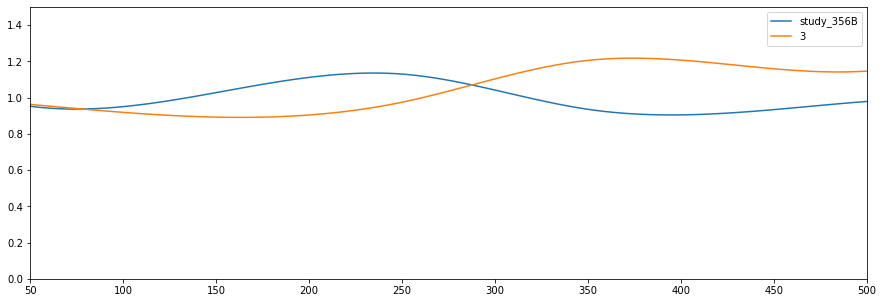

In [119]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo8.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8.columns[col])

plt.legend()
plt.xlim([50,500])
plt.ylim([0,1.5])
plt.show()